In [1]:
from pandas import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [3]:
df= read_csv(r"C:\Users\deepa\asan_innovations\references\bank_churn_data.csv")

In [4]:
df

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})

C:\Users\deepa\AppData\Local\Temp\ipykernel_22980\802712427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'M': 1, 'F': 0})


In [6]:
df['attrition_flag']= df['attrition_flag'].replace({'Existing Customer': 1, 'Attrited Customer': 0})

C:\Users\deepa\AppData\Local\Temp\ipykernel_22980\203987474.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['attrition_flag']= df['attrition_flag'].replace({'Existing Customer': 1, 'Attrited Customer': 0})


In [7]:
df=df.drop('user_id',axis=1)

In [8]:
df['marital_status'].value_counts()

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [9]:
df['card_category'] = df['card_category'].replace({'Blue': 0, 'Silver': 1,'Gold':2,'Platinum':3})

C:\Users\deepa\AppData\Local\Temp\ipykernel_22980\3838525653.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['card_category'] = df['card_category'].replace({'Blue': 0, 'Silver': 1,'Gold':2,'Platinum':3})


In [10]:
df['card_category'].value_counts()

card_category
0    9436
1     555
2     116
3      20
Name: count, dtype: int64

In [12]:
df['marital_status'] = df['marital_status'].replace({'Married': 3, 'Single': 2,'Unknown':1,'Divorced':0})

In [13]:
df['education_level'] = df['education_level'].replace({'Graduate': 6, 'College':5,'High School': 4,'Post-Graduate':3,'Doctorate':2,'Unknown':1,'Uneducated':0})

C:\Users\deepa\AppData\Local\Temp\ipykernel_22980\3163425311.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education_level'] = df['education_level'].replace({'Graduate': 6, 'College':5,'High School': 4,'Post-Graduate':3,'Doctorate':2,'Unknown':1,'Uneducated':0})


In [14]:
df['income_category'].value_counts()

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [15]:
df['income_category'] = df['income_category'].replace({'Less than $40K': 1, '$40K - $60K':2,'$80K - $120K': 3,'$60K - $80K':4,'$120K +':5,'Unknown':0})

C:\Users\deepa\AppData\Local\Temp\ipykernel_22980\1303120097.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income_category'] = df['income_category'].replace({'Less than $40K': 1, '$40K - $60K':2,'$80K - $120K': 3,'$60K - $80K':4,'$120K +':5,'Unknown':0})


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  int64  
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   marital_status            10127 non-null  int64  
 6   income_category           10127 non-null  int64  
 7   card_category             10127 non-null  int64  
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [17]:
scaler = MinMaxScaler()

# Apply scaling to all columns
df_scaled = DataFrame(scaler.fit_transform(df), columns=df.columns)

In [27]:
X = df.drop('attrition_flag', axis=1)
y = df['attrition_flag']

In [29]:
X=DataFrame(scaler.fit_transform(X), columns=X.columns)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
model.score(X_test,y_test)

0.9611714379730174

In [33]:
# Specify a full file path with a filename and extension
model_save_path = r"C:\Users\deepa\asan_innovations\backend\random_forest_model.joblib"

# Save the model
joblib.dump(model, model_save_path)
print(f"Model saved successfully to {model_save_path}")

Model saved successfully to C:\Users\deepa\asan_innovations\backend\random_forest_model.joblib


In [34]:
y_pred = model.predict(X_test)

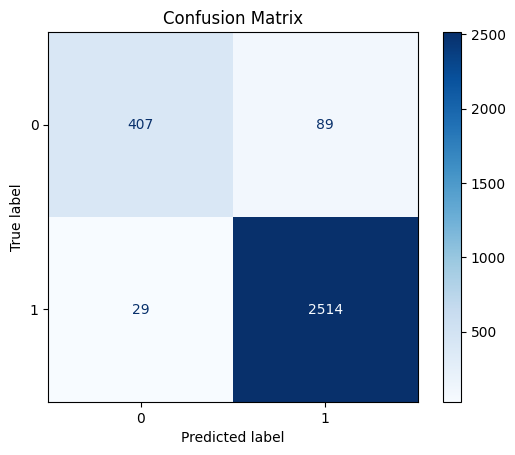

In [35]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [36]:
# Generate a classification report
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.93      0.82      0.87       496
     Class 1       0.97      0.99      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [37]:
joblib.dump(scaler, r"C:\Users\deepa\asan_innovations\backend\scaler.joblib")  # Update the path where you want to save the scaler

['C:\\Users\\deepa\\asan_innovations\\backend\\scaler.joblib']